In [31]:
#Import the data from medical_examination.csv and assign it to the df variable
import pandas as pd

df = pd.read_csv('medical_examination.csv', sep = ',')
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [32]:
#Create the overweight column in the df variable 

df['overweight']=((df['weight'] / (df['height'] / 100) ** 2) > 25).astype(int)
df.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1


In [33]:
#Normalize data by making 0 always good and 1 always bad. 
# If the value of cholesterol or gluc is 1, set the value to 0. 
# If the value is more than 1, set the value to 1.
df['cholesterol']=df['cholesterol'].apply(lambda x:0 if x==1 else 1)
df['gluc']=df['gluc'].apply(lambda x:0 if x==1 else 1)

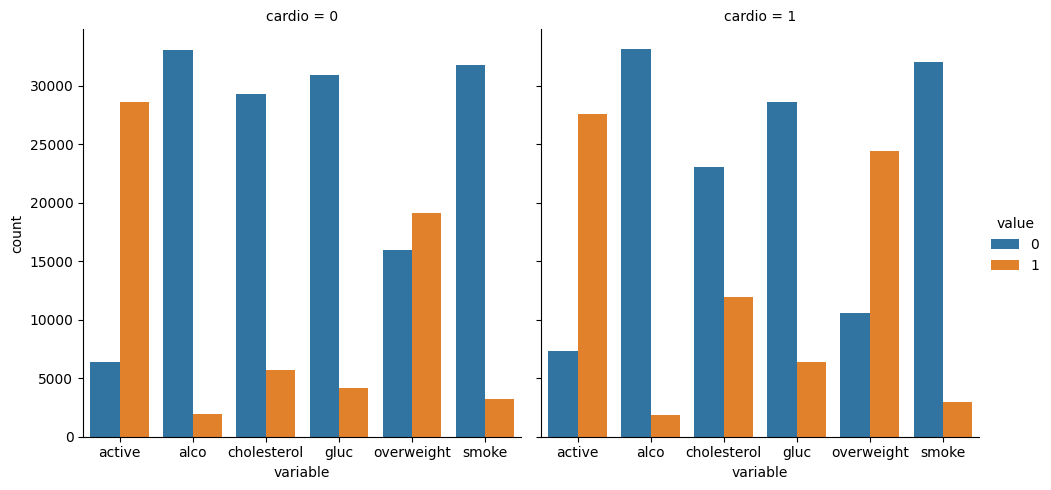

In [34]:
import seaborn as sns 

#Draw the Categorical Plot in the draw_cat_plot function
def draw_cat_plot():
    #Create a DataFrame for the cat plot using pd.melt with values 
    # from cholesterol, gluc, smoke, alco, active, and overweight in 
    # the df_cat variable.
    #Group and reformat the data in df_cat to split it by cardio.
    df_cat=pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])


    # Show the counts of each feature. 
    # You will have to rename one of the columns for the 
    # catplot to work correctly.
    df_cat=df_cat.groupby(['cardio','variable','value']).size().reset_index(name='count')

    #Convert the data into long format and create a chart that shows 
    # the value counts of the categorical features using the following 
    # method provided by the seaborn library import : sns.catplot()
    #Get the figure for the output and store it in the fig variable
    fig=sns.catplot(x='variable',y='count',kind='bar',data=df_cat,col="cardio",hue="value")

    return fig

draw_cat_plot()

<Axes: >

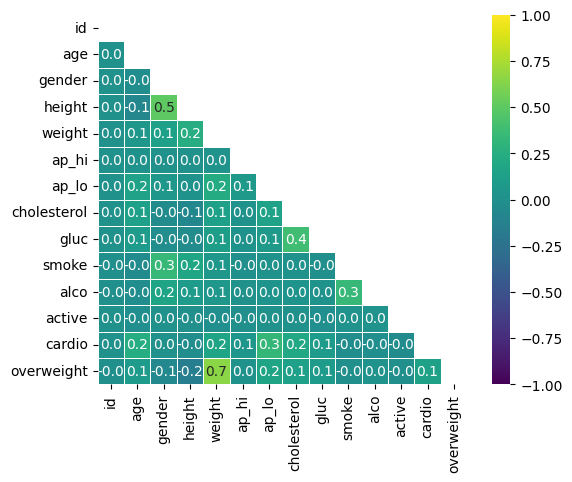

In [35]:
import numpy as np

#Draw the Heat Map in the draw_heat_map function
def draw_heat_map():
    #Clean the data in the df_heat variable by filtering out the following 
    # patient segments that represent incorrect data:

    #diastolic pressure is higher than systolic 
    # (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    df_heat=df[df['ap_lo']<=df['ap_hi']]

    #height is less than the 2.5th percentile 
    # (Keep the correct data with 
    # (df['height'] >= df['height'].quantile(0.025)))
    df_heat=df_heat[df_heat['height']>=df_heat['height'].quantile(0.025)]

    #height is more than the 97.5th percentile
    df_heat=df_heat[df_heat['height']<=df_heat['height'].quantile(0.975)]

    #weight is less than the 2.5th percentile
    df_heat=df_heat[df_heat['weight']>=df_heat['weight'].quantile(0.025)]

    #weight is more than the 97.5th percentile
    df_heat=df_heat[df_heat['weight']<=df_heat['weight'].quantile(0.975)]

    #Calculate the correlation matrix and store it in the corr variable
    corr=df_heat.corr()

    #Generate a mask for the upper triangle and store it in the mask variable
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    #Set up the matplotlib figure
    #Plot the correlation matrix using the method provided by the 
    # seaborn library import: sns.heatmap()
    heatmap=sns.heatmap(corr, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".1f", square=True, linewidths=.5, mask = mask)

    return heatmap

draw_heat_map()